In [5]:
using DelimitedFiles
using CairoMakie
using GLMakie
using LinearAlgebra
using Random

In [32]:
copy_size = 15

nx::Int64 = copy_size
ny::Int64 = copy_size
nz::Int64 = copy_size 

include("./introduction.jl")
include("./ir_spectra.jl")


ir_spectra (generic function with 1 method)

In [33]:
ν0 = 2050.0
νk::Vector{Float64} = collect(ν0- range :step:ν0 + range)
nmols_ml = 4*nx*ny*nz
Random.seed!(1234)
num = sign.(rand(nmols_ml) .- 0.5)
num .* eu
@time ipda, isda, ip, is = ir_spectra(νk,  com_ol, Δν) 

780.206730 seconds (3.98 G allocations: 177.720 GiB, 4.96% gc time, 0.03% compilation time)


([9.973894592366025e-65, 4.965247301334099e-63, 2.3385506648360277e-61, 1.0420378202840165e-59, 4.3929076326540695e-58, 1.7520792042086247e-56, 6.611343923668716e-55, 2.3602689820527757e-53, 7.972058511034478e-52, 2.5475241031165114e-50  …  0.11671226558790558, 0.12166460820453753, 0.1248666868399612, 0.1258680757169084, 0.1244373725886695, 0.1206252566245629, 0.11478008495841875, 0.10750425089060096, 0.09955536478761702, 0.09171384086283606], [6.869032842911574e-65, 3.4186253853083766e-63, 1.6096343295400088e-61, 7.170062048728285e-60, 3.0216125508482226e-58, 1.204689224879415e-56, 4.543932769639036e-55, 1.6214727012015846e-53, 5.4740471231579136e-52, 1.7483519561587048e-50  …  0.04192553565082146, 0.04096331506595185, 0.04009629997749106, 0.03934046783165183, 0.038694639285184934, 0.038151375811285415, 0.037707115946263234, 0.037366221696807186, 0.03713697295156988, 0.037021948751157864], [1.650367315086082e-65, 8.221248018880922e-64, 3.8747863231841966e-62, 1.727879714126516e-60, 7.

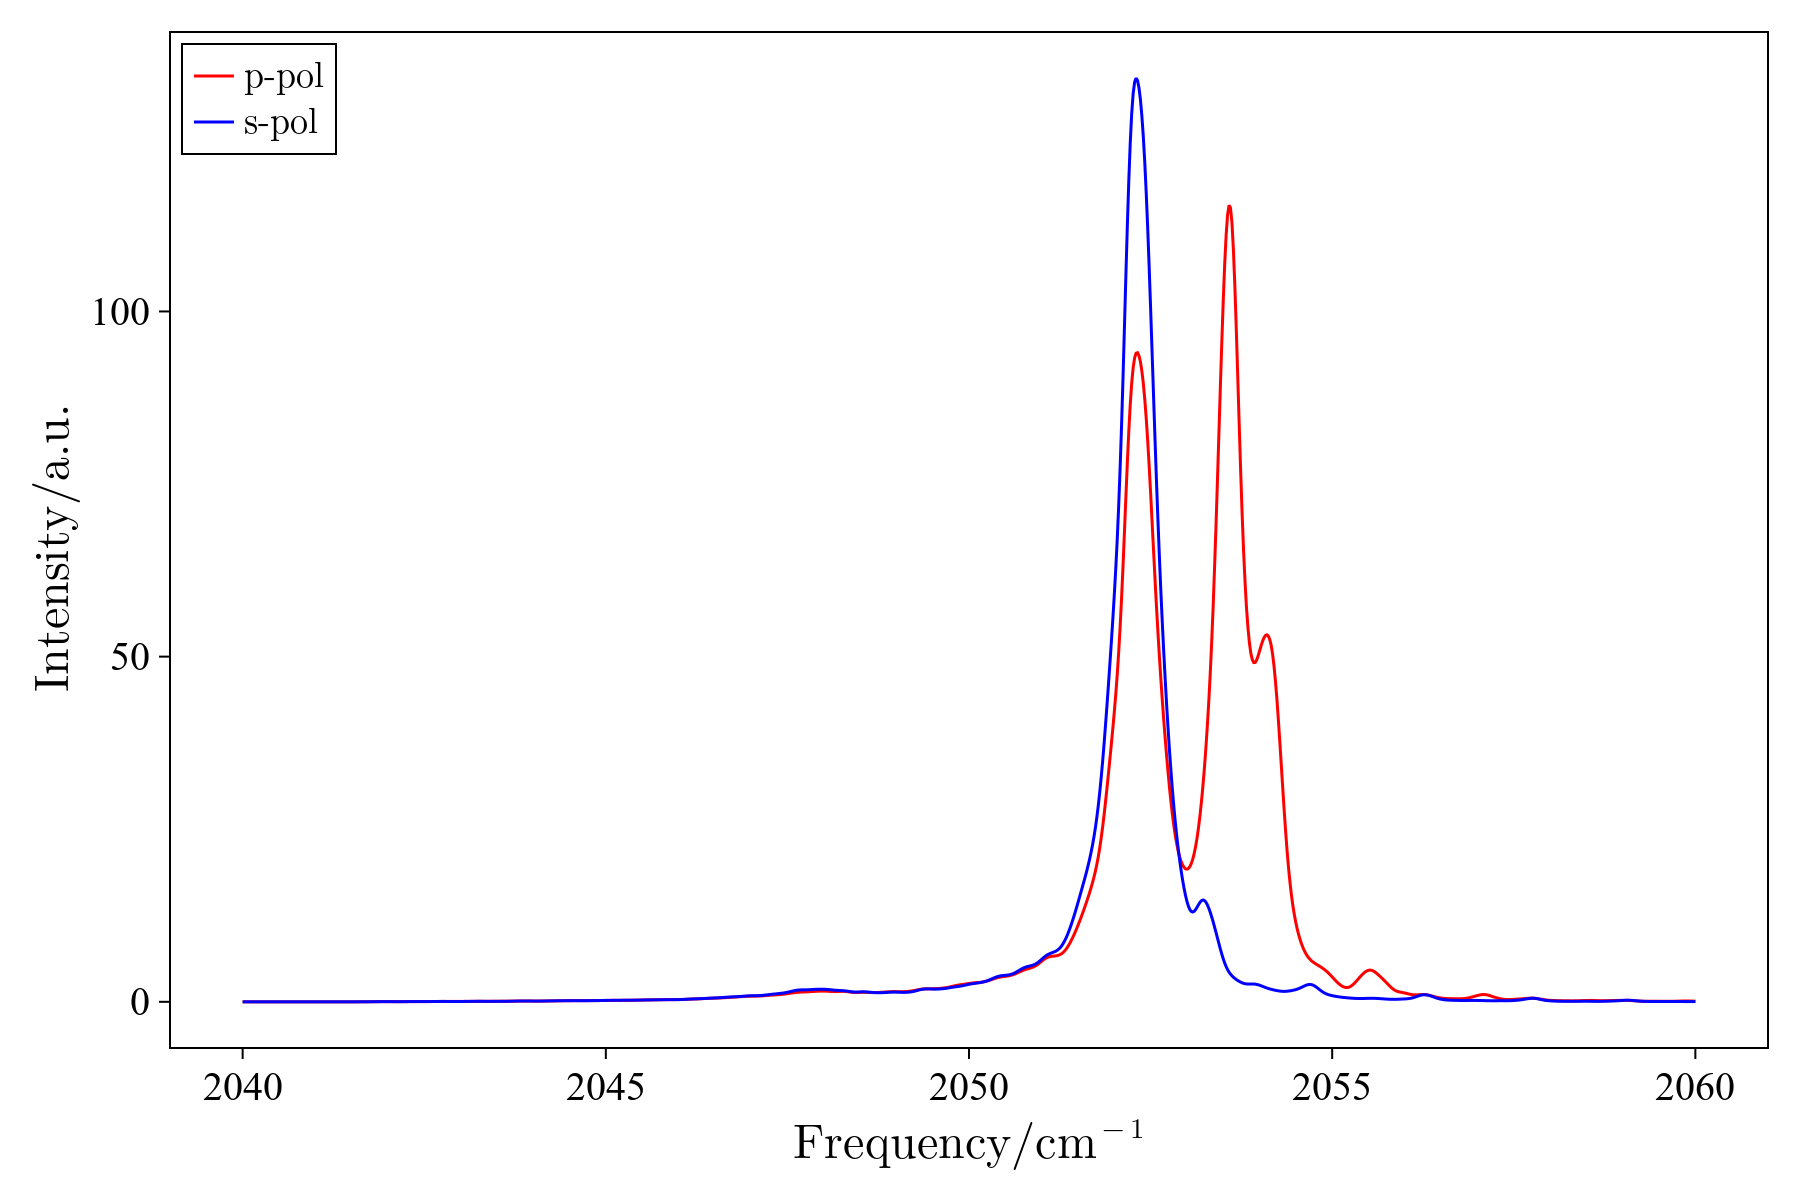

CairoMakie.Screen{IMAGE}


In [38]:
CairoMakie.activate!()
# GLMakie.activate!()
fig = Figure(size=(900, 600))

ax = Axis(fig[1,1], xlabel = L"Frequency/cm$^{-1}$", ylabel = L"Intensity/a.u. $ $", xgridvisible = false, ygridvisible = false)
ax.xlabelsize, ax.ylabelsize  = 24, 24
ax.xticklabelfont, ax.yticklabelfont = "Times New Roman", "Times New Roman"
ax.xticklabelsize, ax.yticklabelsize = 20, 20

α = 0*degrees
ipda_α = (cos(α))^2 .* ipda + (sin(α))^2 .* isda 
isda_α = (cos(α))^2 .* isda + (sin(α))^2 .* ipda 

lines!(ax, νk, ipda, color=:red, label = L"p-pol$ $")
lines!(ax, νk, isda, color=:blue, label = L"s-pol$ $")

axislegend(ax, labelsize = 18, position=:lt)
DataInspector(fig)
display(fig)

In [6]:
GLMakie.activate!()

fig = Figure()
ax = LScene(fig[1,1], show_axis = false)

meshscatter!(ax, com0_ol[:,1], com0_ol[:,2], com0_ol[:,3])

display(fig)


GLMakie.Screen(...)

In [39]:
rand()

0.5396312192884193